# Project: TMDB movie data

## Introduction

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### the columns name in this data is:[ id , imdb_id , popularity , budget , revenue  , original_title,cast , homepage , director , tagline , keywords , overview  , runtime , genres , production_companies , release_date , vote_count , vote_average , release_year , budget_adj , revenue_adj ]
## and they have a strong relationship that we will show in this project

## Example about questions that we Interested for Analysis
### Which genres are most popular from year to year?
### What kinds of properties are associated with movies that have high revenues?

In [465]:
# import packages that we will use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [466]:
# load the data 
data = pd.read_csv("tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data cleaning
### in this section i will clean the unimportant and null data

In [467]:
# drop columns that will not help us
data.drop(["id","imdb_id","homepage","tagline","overview","keywords","production_companies"], axis= 1 , inplace= True)
data.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [468]:
# explore the Properties of the data
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [470]:
data.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

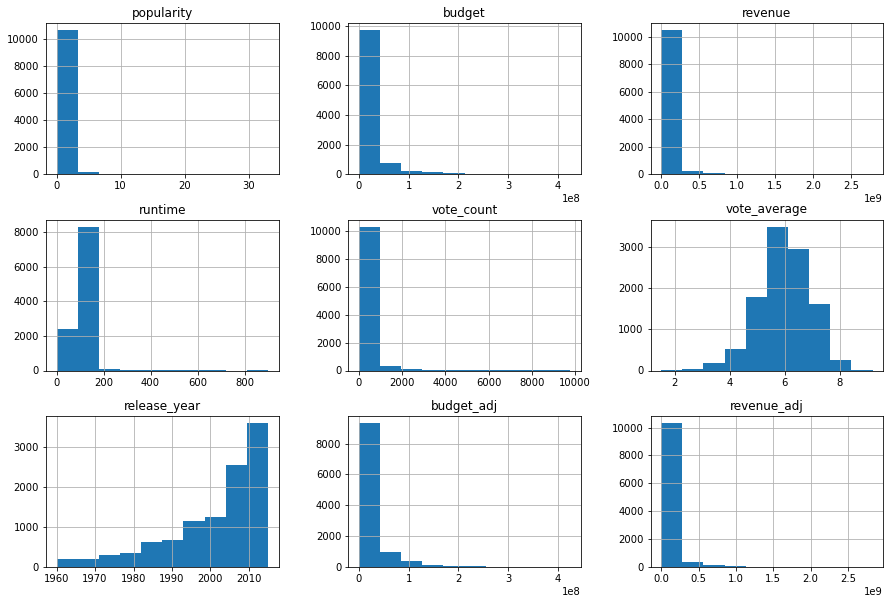

In [471]:
#show hist graph for my data befor delete missing data 
data.hist(figsize=(15,10));

In [472]:
data[data.genres.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,23.000000,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.167966,217.391304,0.0,70.652174,17.521739,6.421739,2004.652174,1220.949640,0.0
std,0.126428,1042.572070,0.0,52.115788,11.746835,1.231760,12.470360,5855.468772,0.0
min,0.020701,0.000000,0.0,0.000000,10.000000,3.000000,1970.000000,0.000000,0.0
25%,0.075151,0.000000,0.0,28.000000,11.000000,5.850000,2000.500000,0.000000,0.0
50%,0.130018,0.000000,0.0,76.000000,12.000000,6.700000,2010.000000,0.000000,0.0
75%,0.246796,0.000000,0.0,100.000000,18.500000,7.100000,2012.500000,0.000000,0.0
max,0.520520,5000.000000,0.0,220.000000,57.000000,8.500000,2015.000000,28081.841720,0.0


#### I will removed any row has missed data, because the most information in this row = null or 0 which is not useful so I deleted it

In [473]:
# drop null data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


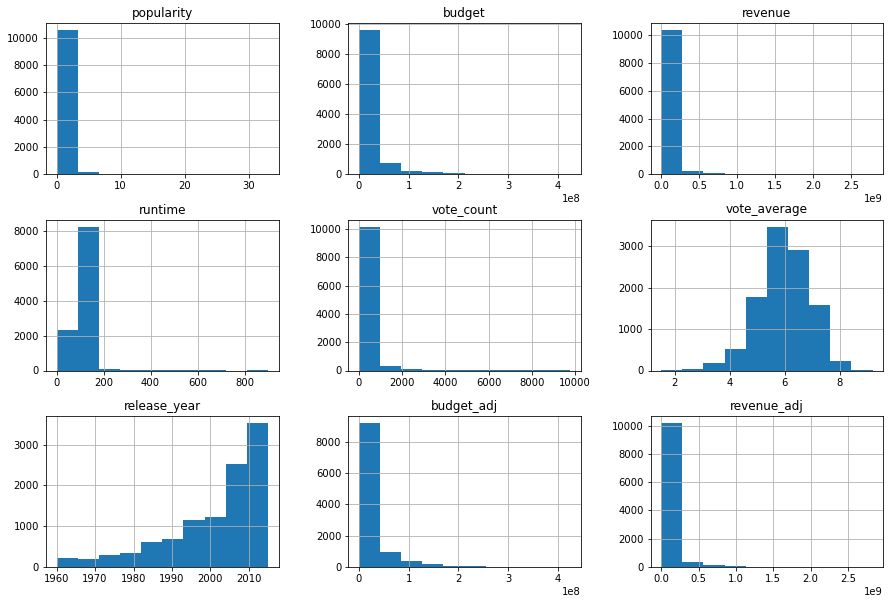

In [474]:
#show hist graph for my data after delete missing data 
data.hist(figsize=(15,10));

## Exploratory Data Analysis
### Research Question 1: Which genres are most popular from year to year? 

In [475]:
data.describe().popularity

count    10732.000000
mean         0.652609
std          1.004757
min          0.000188
25%          0.210766
50%          0.387135
75%          0.720621
max         32.985763
Name: popularity, dtype: float64

In [476]:
#splitting genres rows in separate data frame
df_genres=pd.DataFrame(data=data["genres"].str.split('|').tolist(),index=[data["release_year"],data["popularity"]]).stack() 
df_genres=df_genres.reset_index([0,1])
#renaming genres column
df_genres.rename(mapper={0:'genres'},axis=1,inplace=True) 
df_genres.head()

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller
0,2015,28.419936,Action


In [477]:
# The least popularity movie
min_pop= df_genres.query('popularity <= 0.000188')
min_pop

,release_year,popularity,genres
0,1971,0.000188,Mystery
1,1971,0.000188,Comedy
2,1971,0.000188,Drama


In [478]:
# The most popularity movie
max_pop = df_genres.query('popularity >= 32.985763')
max_pop

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller


In [479]:
# Convert release_year (int datatype) to string.
df_genres["release_year"]=df_genres["release_year"].astype(str)
#divide into decades
df_genres.release_year=df_genres.release_year.apply(lambda x: x[:3]+'0')
#creating data frame grouped by decades and genres
df_genres_popularity=pd.DataFrame(df_genres.groupby(['release_year','genres'],as_index=False).popularity.sum())
df_genres_popularity.head()

,release_year,genres,popularity
0,1960,Action,41.238437
1,1960,Adventure,46.677670
2,1960,Animation,12.393190
3,1960,Comedy,46.260995
4,1960,Crime,20.421047


In [480]:
#Draw graph represent count of movies' in each genres and  each decades
# I used this link to help me in Draw this plots: https://bit.ly/3hGzTNE

df_genres1=df_genres_popularity.query("release_year== '1960'")
df_genres2=df_genres_popularity.query("release_year== '1970'")
df_genres3=df_genres_popularity.query("release_year== '1980'")
df_genres4=df_genres_popularity.query("release_year== '1990'")
df_genres5=df_genres_popularity.query("release_year== '2000'")
df_genres6=df_genres_popularity.query("release_year== '2010'")

df_list= [df_genres1, df_genres2, df_genres3, df_genres4, df_genres5, df_genres6]
s= df_genres1.groupby(df_genres1['genres'].unique())

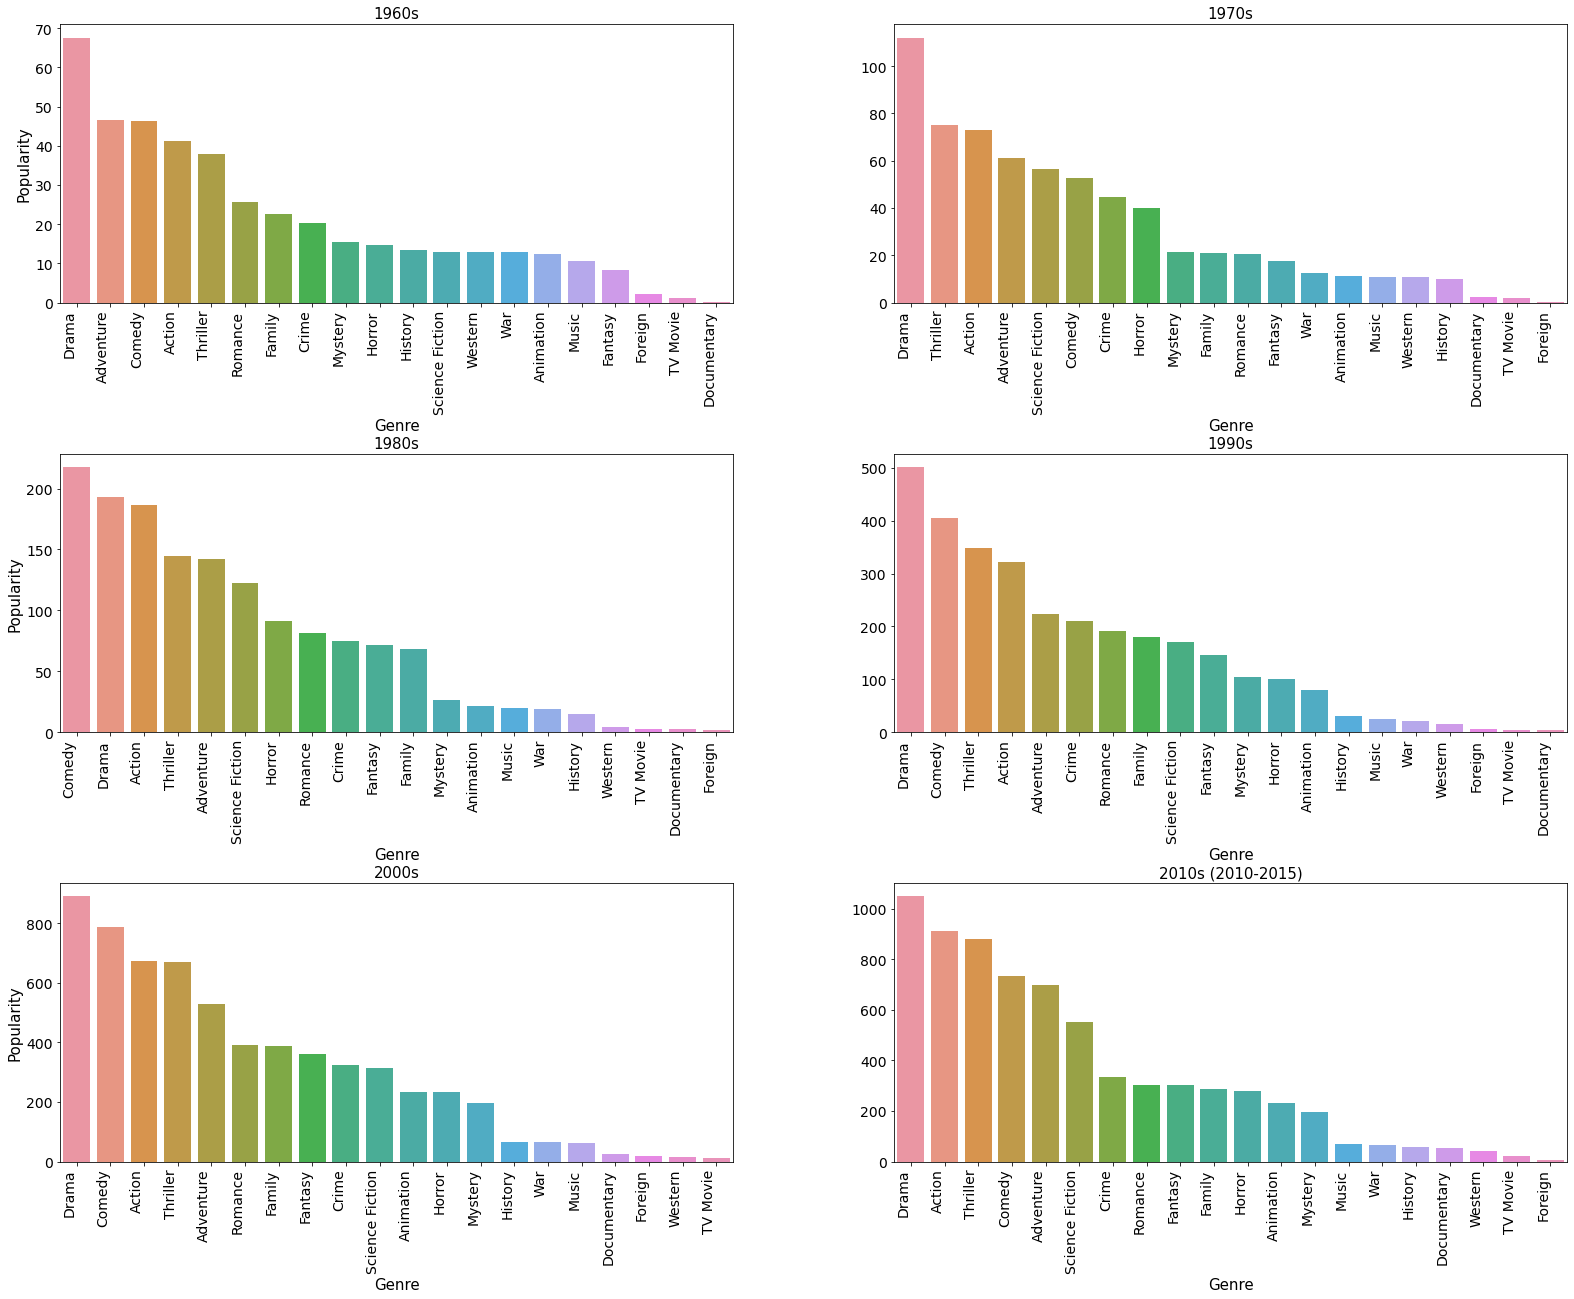

In [481]:
fig, axes = plt.subplots(3, 2,figsize=(25,20))
plt.xticks(size=20,rotation='vertical')
fig.tight_layout(pad=13)
count=0
for row in range(3):
    for col in range(2):
        ax=sns.barplot( x='genres',y='popularity',data=df_list[count],ax=axes[row,col],\
                       order=df_list[count].sort_values('popularity',ascending=False).genres)
        
        if df_list[count].release_year.unique()[0] != '2010':
            ax.set_title(df_list[count].release_year.unique()[0] + "s",size=15)
        else:
            ax.set_title(df_list[count].release_year.unique()[0] + "s"+ " (2010-2015)",size=15)
            
        if col != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Popularity", size=15)    
        ax.set_xlabel('Genre',size=15)
        ax.tick_params(labelsize=14 ,rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
        count+=1

#### Popularity is growing in every decade and the genres that most frequently entered the top 5 terms of popularity in each decade:

- Drama
- Action
- Comedy
- Thriller
- Adventure

##### Drama is the most popular genre in all decades except in 1980s , Comedy has most popular in this decades .
##### The most popularity movie was in 2015 and his genre (Action|Adventure|Science Fiction|Thriller) .
##### The least popularity movie was in 1971 and his genre (Drama|Comedy|Mystery) .



## What kinds of properties are associated with movies that have high revenues?


In [482]:
data.revenue_adj.describe()

count    1.073200e+04
mean     5.200147e+07
std      1.454192e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.470526e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [483]:
data[(data.revenue_adj >= 3.470526e+07)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [484]:
#I tack top 10 high revenue to analysis it 
df_high_revenue = data.sort_values(by='revenue_adj',ascending = False)
df_high_revenue=df_high_revenue[0:10]
df_high_revenue

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09


In [485]:
# Top ten director with revenue
df_dir_rev = df_high_revenue[["director","revenue_adj"]]
x = list(df_dir_rev.director)
y = list(df_dir_rev.revenue_adj)

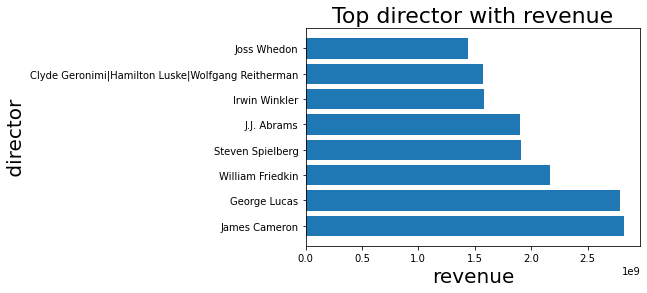

In [486]:
plt.barh(x , y )
plt.title('Top director with revenue',size=22)
plt.xlabel("revenue", size=20 )
plt.ylabel(" director ", size=20);
plt.show()

In [487]:
df_less_revenue = data.sort_values(by='revenue_adj',ascending = True)
df_less_revenue=df_less_revenue[0:10]
df_less_revenue


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,11/15/66,15,1.5,1966,127642.279154,0.0
5668,0.469146,0,0,Breakout,Brendan Fraser|Dominic Purcell|Ethan Suplee|La...,Damian Lee,89,Action|Thriller,9/4/13,18,4.3,2013,0.000000,0.0
5667,0.470131,0,0,My Little Pony: Equestria Girls,Tara Strong|Ashleigh Ball|Andrea Libman|Tabith...,Jayson Thiessen,72,Animation|Comedy|Family|Fantasy|Music,6/15/13,35,7.4,2013,0.000000,0.0
5665,0.470645,0,0,Trust Me,Clark Gregg|Saxon Sharbino|Amanda Peet|Sam Roc...,Clark Gregg,90,Comedy,4/20/13,11,5.6,2013,0.000000,0.0
5663,0.473599,0,0,30 Nights of Paranormal Activity With the Devi...,Kathryn Fiore|Flip Schultz|Olivia Alexander|Ar...,Craig Moss,80,Comedy,1/14/13,18,2.6,2013,0.000000,0.0
5660,0.481309,0,0,Very Good Girls,Dakota Fanning|Elizabeth Olsen|Boyd Holbrook|D...,Naomi Foner Gyllenhaal,91,Drama,1/22/13,91,5.7,2013,0.000000,0.0
5659,0.489233,0,0,Open Grave,Sharlto Copley|Joseph Morgan|Thomas Kretschman...,Gonzalo LÃ³pez-Gallego,102,Horror|Thriller|Mystery,8/13/13,143,5.8,2013,0.000000,0.0
5658,0.489972,0,0,Jug Face,Sean Bridgers|Lauren Ashley Carter|Sean Young|...,Chad Crawford Kinkle,81,Horror|Thriller|Drama,8/9/13,29,5.2,2013,0.000000,0.0
5657,0.503750,0,0,Coldwater,P.J. BoudousquÃ©|James C. Burns|Chris Petrovsk...,Vincent Grashaw,104,Thriller|Drama,3/10/13,49,6.7,2013,0.000000,0.0
5655,0.509519,100000,0,A Teacher,Lindsay Burdge|Will Brittain|Jennifer Prediger...,Hannah Fidell,75,Drama,9/6/13,17,4.3,2013,93603.335274,0.0


In [488]:
# less ten director with revenue
df_rev_dir = df_less_revenue[["director","revenue_adj"]]
df_rev_dir

,director,revenue_adj
10865,Harold P. Warren,0.0
5668,Damian Lee,0.0
5667,Jayson Thiessen,0.0
5665,Clark Gregg,0.0
5663,Craig Moss,0.0
5660,Naomi Foner Gyllenhaal,0.0
5659,Gonzalo LÃ³pez-Gallego,0.0
5658,Chad Crawford Kinkle,0.0
5657,Vincent Grashaw,0.0
5655,Hannah Fidell,0.0


### so top ten director with revenue in one movie:
#### ['James Cameron', 'George Lucas', 'James Cameron', 'William Friedkin', 'Steven Spielberg', 'J.J. Abrams', 'Steven Spielberg', 'Irwin Winkler', 'Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman', 'Joss Whedon']

### and less ten director with revenue in one movie:
#### ['Harold P. Warren', 'Damian Lee', 'Jayson Thiessen', 'Clark Gregg', 'Craig Moss', 'Naomi Foner Gyllenhaal', 'Gonzalo LÃ³pez-Gallego', 'Chad Crawford Kinkle', 'Vincent Grashaw', 'Hannah Fidell']

# Conclusions


### In this project we analyesd TMDB 10000 Movies. more than 50% of movies after 2006 . in first we exploration and clean our data to be able to work. Then we extract some data which can help us to answer some questions which can help us to understand this data. at last we analsys our data and represent this analsys by some of chart and table to obvious our result to help in answer on our questions.

### we found that we have 20 genres in our data, some of genres has more frequently occurring than others. the top 5 higher frequently genres are:

- Drama
- Comedy
- Thriller
- Action
- Romance
### The most frequently five geners from year to year is drama , comedy thriller, action and romance. **Popularity is growing in every decade and the genres that most frequently entered the top 5 terms of popularity in each decade:**
- Drama
- Comedy
- Thriller
- Action
- Adventure
### Drama is the most popular genre in all decades except in 1980s , Comedy has most popular in this decades . The most popular five geners from year to year is drama , comedy thriller, action and Adventure. **the top 5 genres of the most top 1000 high revenue movies is:**
- Action
- Adventure
- Drama
- Comedy
- Thriller
### and most popularity movie genre was in 2015 and his genre (Action|Adventure|Science Fiction|Thriller) .
### The least popularity movie genre was in 1971 and his genre (Drama|Comedy|Mystery) .

## Top ten director with revenue in one movie:
#### 1) James Cameron
#### 2) George Lucas
#### 3) James Cameron
#### 4) William Friedkin
#### 5) Steven Spielberg
#### 6) J.J. Abrams
#### 7) Steven Spielberg
#### 8) Irwin Winkler
#### 9) Clyde Geronimi | Hamilton Luske | Wolfgang Reitherman
#### 10) Joss Whedon

## James Cameron has two films in top ten that's a great work from him.

## and less ten director with revenue in one movie:
###  ['Harold P. Warren', 'Damian Lee', 'Jayson Thiessen', 'Clark Gregg', 'Craig Moss', 'Naomi Foner Gyllenhaal', 'Gonzalo LÃ³pez-Gallego', 'Chad Crawford Kinkle', 'Vincent Grashaw', 'Hannah Fidell']

In [489]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295